<a href="https://colab.research.google.com/github/QuetzaFdz/Extraccion_de_caracteristicas/blob/main/Actividad_4_(Extracci%C3%B3n_de_caracter%C3%ADsticas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 5.3 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=c323f0ab0b7caf9e2a5d4d81c71219314a150cedb6fc5d4ccc33c764ae616ef4
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 
from google.colab import files
files.upload()

Saving microretailer_mit_lift_lab.xlsx to microretailer_mit_lift_lab (1).xlsx


{'microretailer_mit_lift_lab.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [62]:
#Imprimios el dataframe
df=pd.read_excel('microretailer_mit_lift_lab.xlsx')

#Obtenemos la información del dataframe
print('\n Información del Data Frame')
info=df.info()
display(info)

#Realizamos conteo del total de nulos del data frame
print('\n Valores nulos del Data Frame')
nulos=df.isnull().sum()
display(nulos)
#from google.colab import files
#nulos.to_excel('NulosA4.xlsx')
#files.download('NulosA4.xlsx')

#Generamos una copia del Data Frame
df2=df.copy()


 Información del Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


None


 Valores nulos del Data Frame


_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [63]:
#Separamos las columnas con variables cualitativas y las variables cuantitativas
cuanti=df.select_dtypes(include=['float64','int64'])
cuali=df.select_dtypes(include=['object'])

#Eliminamos las columnas que no tienen ninguna variable
#df2=df2.drop(['271_card_fee'], axis=1)
#df2=df2.drop(['273_platform_extra_charge'],axis=1)
#df2=df2.drop(['274_platform_fee'],axis=1)
#df2=df2.drop(['275_platform_days_receive_money'],axis=1)

#Sustituimos con texto "Sin datos" de las columnas cualitativas que no cuentan con variables
sinncuali=cuali.fillna('Sin datos')

#Sustituimos con un 0 las columnas cuantitativas que no cuentan con variables
sinncuanti=cuanti.fillna('0')

#Concatenamos las columnas para tener un colo data frame
print('\n Data Frame limpio')
todo=pd.concat([sinncuali,sinncuanti],axis=1)
display(todo)

#Imprimimos nuevamente los valores nulos para verificar que ya no contamos con estos
print('\n Número de valores nulos')
nulos2=todo.isnull().sum().sum()
nulos2


 Data Frame limpio


,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,19_tax_id,310_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,35_interest_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,Sin datos,yes,yes,2021-04-12,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,Sin datos,yes,no,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Redes sociales,no,Sin datos,Sin datos,Software especializado,no,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,no,Sin datos,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,no,Sin datos,Sin datos,Sin datos,19.053536,-98


 Número de valores nulos


0

In [75]:
#Aplicamos método de desviación estandar para sustituir outliers de las columnas con valores cuantitativos
y=sinncuanti
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

print('\n Outliers')
outliers= sinncuanti[(y>Limite_Superior)|(y<Limite_Inferior)]
display(outliers)

print('\n Datos que no son outliers')
data_clean= sinncuanti[(y<=Limite_Superior)&(y>=Limite_Inferior)]
display(data_clean)

print('\n Sustituir outliers por el promedio de la columna')
g2m=sinncuanti.fillna(round(sinncuanti.mean(),1))
display(g2m)

print('\n Tablas concatenadas')
todo2=pd.concat([sinncuali,g2m],axis=1)
todo2

Limite superior permitido 104_how_many_shelves_does_the_micro_retailer_have    55.812917
271_card_fee                                               NaN
273_platform_extra_charge                                  NaN
274_platform_fee                                           NaN
275_platform_days_receive_money                            NaN
97_number_of_customers_in_store                       6.591777
_latitude                                            19.111172
_longitude                                          -98.090304
dtype: float64
Limite inferior permitido 104_how_many_shelves_does_the_micro_retailer_have   -42.397712
271_card_fee                                               NaN
273_platform_extra_charge                                  NaN
274_platform_fee                                           NaN
275_platform_days_receive_money                            NaN
97_number_of_customers_in_store                      -3.808151
_latitude                                          

<ipython-input-75-2daeedc0ff0b>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-75-2daeedc0ff0b>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-75-2daeedc0ff0b>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence th

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Datos que no son outliers


<ipython-input-75-2daeedc0ff0b>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean= sinncuanti[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.053561,-98.234142,0.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.058655,-98.232300,0.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.059293,-98.233158,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.059585,-98.233864,0.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,19.042794,-98.193802,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,19.042809,-98.193439,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,19.042558,-98.193818,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Sustituir outliers por el promedio de la columna


<ipython-input-75-2daeedc0ff0b>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  g2m=sinncuanti.fillna(round(sinncuanti.mean(),1))


,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2,0.0,4,2.0,2.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
1,19.053561,-98.234142,0,4.0,8,1.0,1.0,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0
2,19.058655,-98.232300,0,0.0,24,2.0,2.0,0,0.0,0,0,0.0,0,0,0,10.0,0,0,0,0,0,0,0,60.0,0
3,19.059293,-98.233158,0,0.0,2,1.0,1.0,0,4.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
4,19.059585,-98.233864,0,0.0,16,0.0,0.0,0,0.0,0,0,1.0,0,0,0,15.0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1,0.0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
167,19.042794,-98.193802,1,5.0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
168,19.042809,-98.193439,3,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
169,19.042558,-98.193818,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



 Tablas concatenadas


,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,19_tax_id,310_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,35_interest_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,Sin datos,yes,yes,2021-04-12,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,Sin datos,yes,no,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Redes sociales,no,Sin datos,Sin datos,Software especializado,no,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,no,Sin datos,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,no,Sin datos,Sin datos,Sin datos,19.053536,-98

In [78]:
#Imprimimos los datos cualitativos para identificar rápidamente las columnas con estos valores
cuanti2=todo2.select_dtypes(include=['float64','int64'])
cuali2=todo2.select_dtypes(include=['object'])
display(cuali2)

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,19_tax_id,310_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,35_interest_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email,268_number_fridges,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,Sin datos,yes,yes,2021-04-12,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,Sin datos,yes,no,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Redes sociales,no,Sin datos,Sin datos,Software especializado,no,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,no,Sin datos,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,no,Sin datos,Sin datos,Sin datos,0.0,2.0,2.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620
Eduardo Zárate,9,0.052632,0.567251
Alejandro Matias,8,0.046784,0.614035
Harry Hernández,7,0.040936,0.654971


Text(0, 0.5, 'Valores univariables')

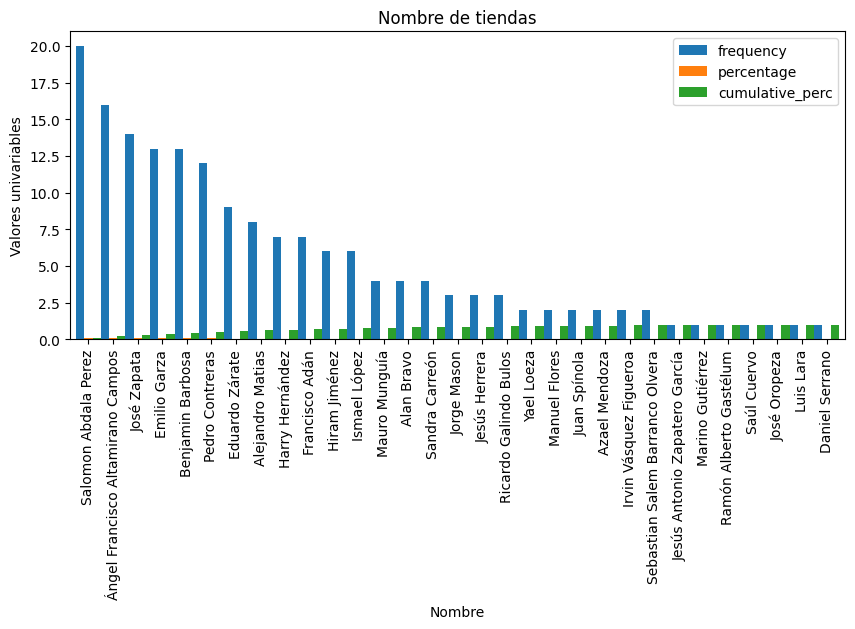

In [96]:
#Análisis univariable de una columna
ub=freq_tbl(cuali2['_updated_by'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_ub=ub.set_index('_updated_by')
display(Filtro_ub)

#Gráfica de barras
Filtro_ub.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Nombre de tiendas')
plt.xlabel('Nombre')
plt.ylabel('Valores univariables')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708
"Security cameras,Smartphone",7,0.040936,0.590643
"Dataphone (i.e. card payments),Security cameras,Smartphone",5,0.029240,0.619883
Security cameras,5,0.029240,0.649123
"POS system (i.e. computer + bar code scanner + printer),Security cameras,Smartphone",4,0.023392,0.672515


Text(0, 0.5, 'Valores univariables')

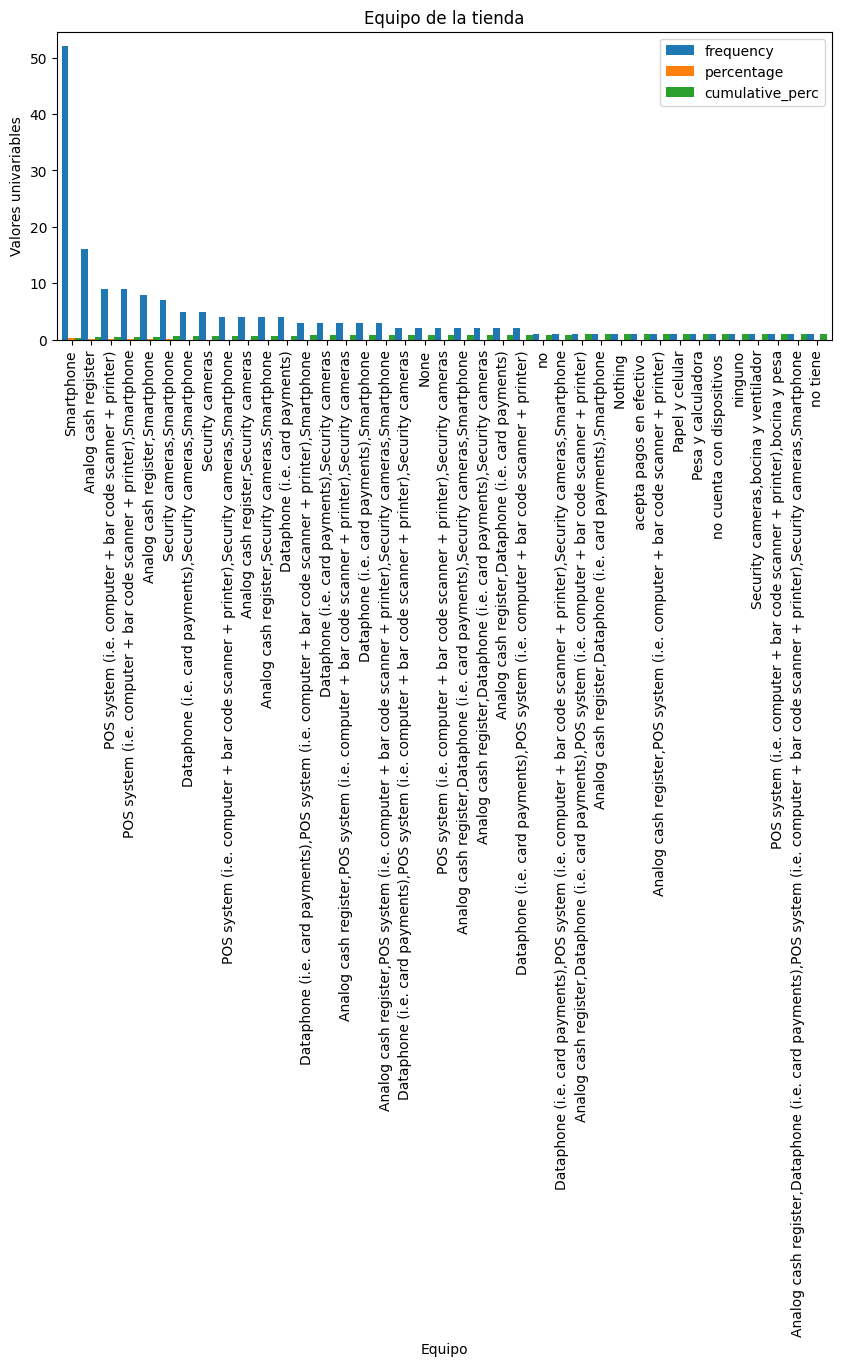

In [85]:
#Análisis univariable de una columna
sd=freq_tbl(cuali2['184_store_devices'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_sd=sd.set_index('184_store_devices')
display(Filtro_sd)

#Gráfica de barras
Filtro_sd.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Equipo de la tienda')
plt.xlabel('Equipo')
plt.ylabel('Valores univariables')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Sin datos,76,0.444444,0.444444
Redes sociales,27,0.157895,0.602339
Aplicación móvil,21,0.122807,0.725146
Ninguna,20,0.116959,0.842105
"Aplicación móvil,Redes sociales",13,0.076023,0.918129
Cuaderno,6,0.035088,0.953216
Teléfono,1,0.005848,0.959064
"Cuaderno,Redes sociales",1,0.005848,0.964912
"Aplicación móvil,De frente",1,0.005848,0.970760


Text(0, 0.5, 'Valores univariables')

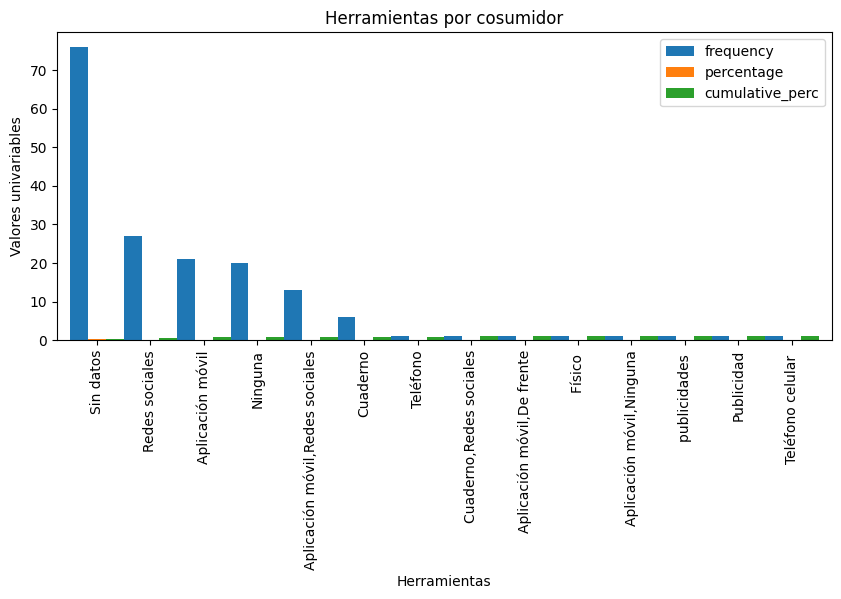

In [97]:
#Análisis univariable de una columna
crt=freq_tbl(cuali2['214_customer_relationship_tools'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_crt=crt.set_index('214_customer_relationship_tools')
display(Filtro_crt)

#Gráfica de barras
Filtro_crt.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas por cosumidor')
plt.xlabel('Herramientas')
plt.ylabel('Valores univariables')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Sin datos,75,0.438596,0.438596
Semanalmente,40,0.233918,0.672515
Diariamente,32,0.187135,0.859649
Nunca,8,0.046784,0.906433
Mensualmente,7,0.040936,0.947368
Quincenalmente,5,0.029240,0.976608
Anualmente,2,0.011696,0.988304
Semestralmente,1,0.005848,0.994152
No se tiene,1,0.005848,1.000000


Text(0, 0.5, 'Valores univariables')

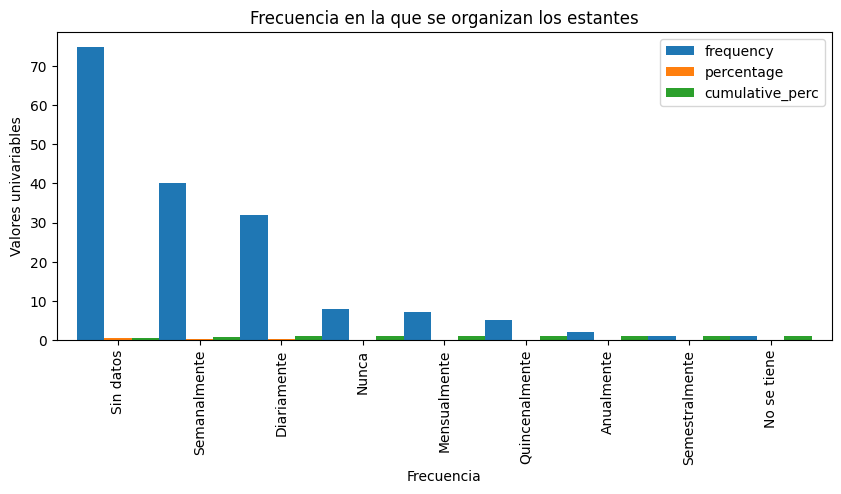

In [91]:
#Análisis univariable de una columna
fos=freq_tbl(cuali2['157_frequency_organize_shelves'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_fos=fos.set_index('157_frequency_organize_shelves')
display(Filtro_fos)

#Gráfica de barras
Filtro_fos.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Frecuencia en la que se organizan los estantes')
plt.xlabel('Frecuencia')
plt.ylabel('Valores univariables')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
158_charact_organize_products_on_shelves,,,
Sin datos,79,0.461988,0.461988
"Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)",29,0.169591,0.631579
Frecuencia de venta,15,0.087719,0.719298
Tamaño,9,0.052632,0.771930
Margen de utilidad,8,0.046784,0.818713
Precio,6,0.035088,0.853801
Refrigeración,4,0.023392,0.877193
"Frecuencia de venta,Refrigeración",3,0.017544,0.894737
"Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.),Refrigeración",3,0.017544,0.912281


Text(0, 0.5, 'Valores univariables')

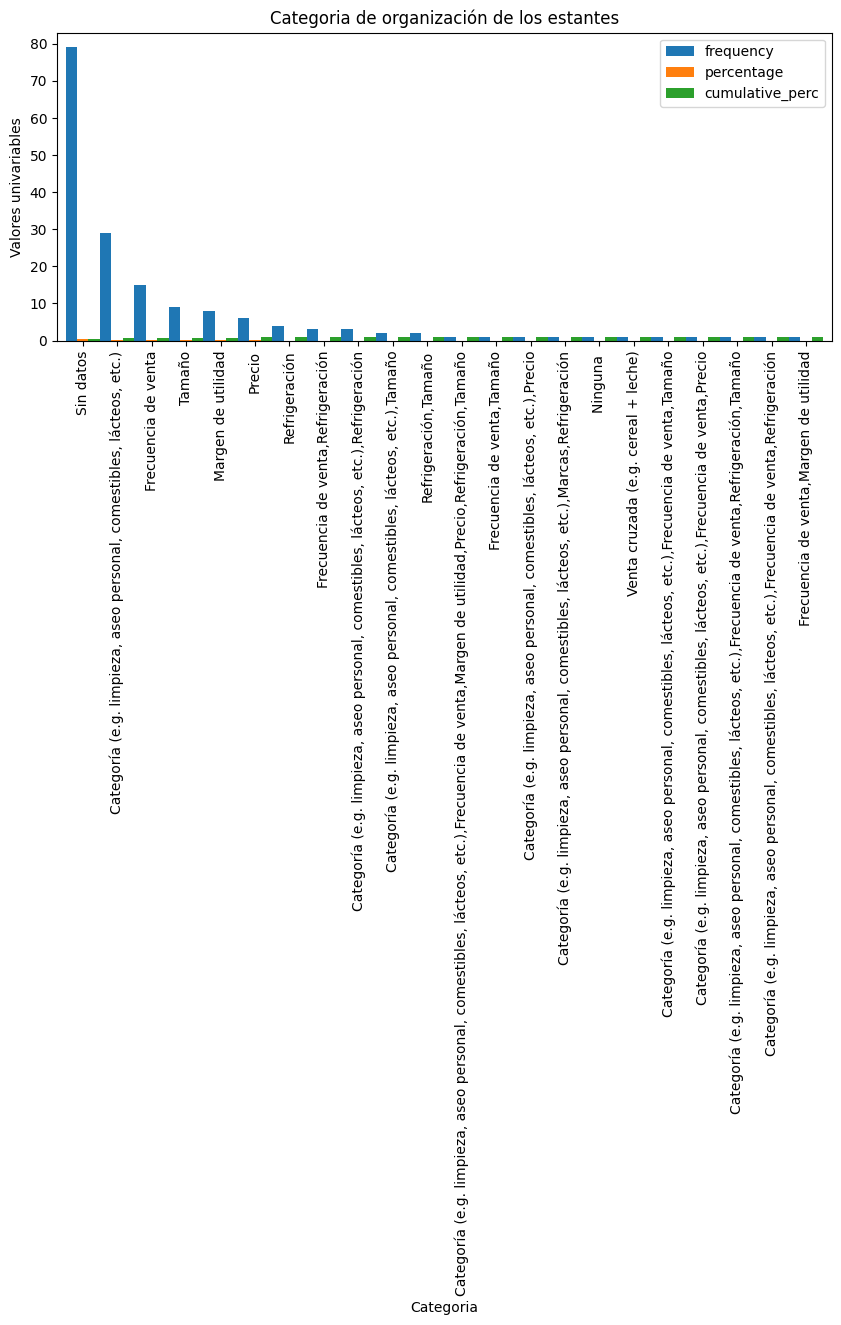

In [92]:
#Análisis univariable de una columna
copos=freq_tbl(cuali2['158_charact_organize_products_on_shelves'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_copos=copos.set_index('158_charact_organize_products_on_shelves')
display(Filtro_copos)

#Gráfica de barras
Filtro_copos.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Categoria de organización de los estantes')
plt.xlabel('Categoria')
plt.ylabel('Valores univariables')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
108_does_the_micro_retailer_has_a_barred_window_,,,
no,124,0.725146,0.725146
yes,47,0.274854,1.000000


Text(0.5, 1.0, 'Porcentaje por ventana enrajada')

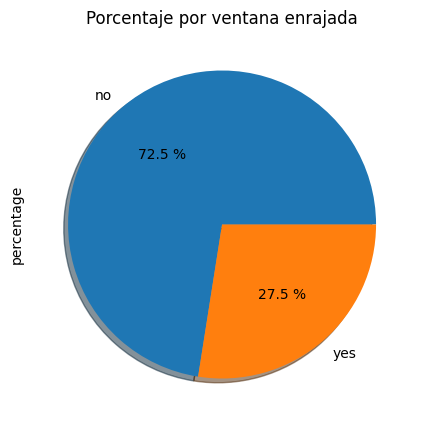

In [123]:
#Análisis univariable de una columna
dtmr=freq_tbl(cuali2['108_does_the_micro_retailer_has_a_barred_window_'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_dtmr=dtmr.set_index('108_does_the_micro_retailer_has_a_barred_window_')
display(Filtro_dtmr)

#Gráfica de pie
Filtro_dtmr['percentage'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Porcentaje por ventana enrajada')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
99_does_the_micro_retailer_exhibits_products_outside_,,,
no,120,0.701754,0.701754
yes,51,0.298246,1.000000


Text(0.5, 1.0, 'Porcentaje por productos exhibidos')

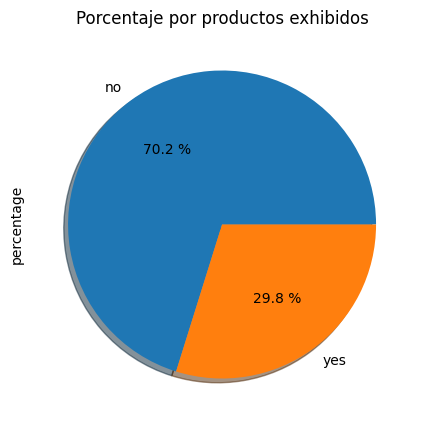

In [124]:
#Análisis univariable de una columna
dtmre=freq_tbl(cuali2['99_does_the_micro_retailer_exhibits_products_outside_'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_dtmre=dtmre.set_index('99_does_the_micro_retailer_exhibits_products_outside_')
display(Filtro_dtmre)

#Gráfica de pie
Filtro_dtmre['percentage'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Porcentaje por productos exhibidos')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
102_does_the_micro_retailer_sells_fresh_products_,,,
no,105,0.614035,0.614035
yes,66,0.385965,1.000000


Text(0.5, 1.0, 'Porcentaje por productos frescos exhibidos')

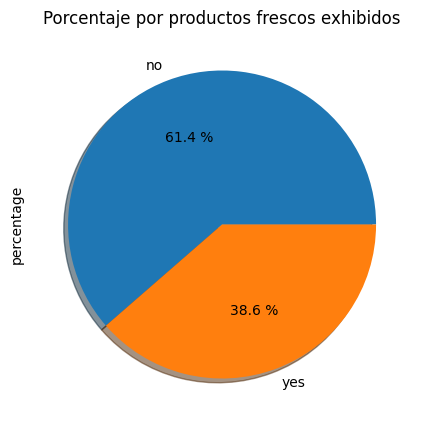

In [125]:
#Análisis univariable de una columna
dtmrs=freq_tbl(cuali2['102_does_the_micro_retailer_sells_fresh_products_'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_dtmrs=dtmrs.set_index('102_does_the_micro_retailer_sells_fresh_products_')
display(Filtro_dtmrs)

#Gráfica de pie
Filtro_dtmrs['percentage'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Porcentaje por productos frescos exhibidos')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,,,
yes,113,0.660819,0.660819
no,58,0.339181,1.000000


Text(0.5, 1.0, 'Estudiantes del tec')

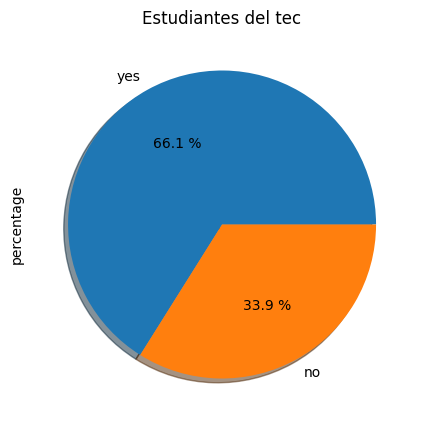

In [126]:
#Análisis univariable de una columna
hsed=freq_tbl(cuali2['hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_hsed=hsed.set_index('hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz')
display(Filtro_hsed)

#Gráfica de pie
Filtro_hsed['percentage'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Estudiantes del tec')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
le_comento_que_toda_esta_informacin_es_confidencial,,,
yes,164,0.959064,0.959064
no,7,0.040936,1.000000


Text(0.5, 1.0, 'Información confidencial')

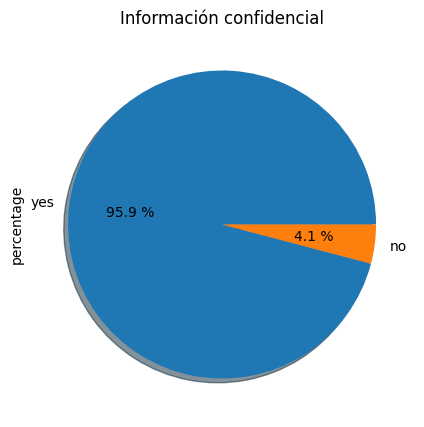

In [127]:
#Análisis univariable de una columna
lcqt=freq_tbl(cuali2['le_comento_que_toda_esta_informacin_es_confidencial'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_lcqt=lcqt.set_index('le_comento_que_toda_esta_informacin_es_confidencial')
display(Filtro_lcqt)

#Gráfica de pie
Filtro_lcqt['percentage'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Información confidencial')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
268_number_fridges,,,
0.0,80,0.467836,0.467836
1.0,26,0.152047,0.619883
2.0,25,0.146199,0.766082
3.0,16,0.093567,0.859649
5.0,7,0.040936,0.900585
4.0,4,0.023392,0.923977
6.0,4,0.023392,0.947368
0,3,0.017544,0.964912
7.0,1,0.005848,0.970760


Text(0.5, 1.0, 'Número de refrigeradores')

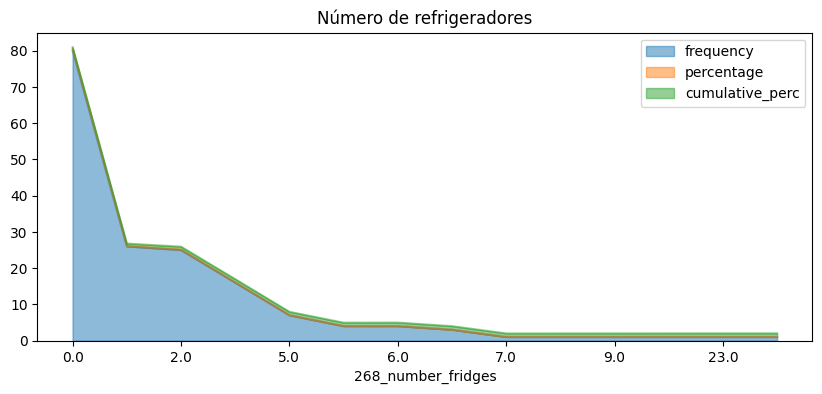

In [122]:
#Análisis univariable de una columna
nf=freq_tbl(cuali2['268_number_fridges'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_nf=nf.set_index('268_number_fridges')
display(Filtro_nf)

#Gráfica de área
Filtro_nf.plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.title('Número de refrigeradores')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
2_current_permanent_employees,,,
0,60,0.350877,0.350877
1.0,33,0.192982,0.543860
2.0,26,0.152047,0.695906
0.0,26,0.152047,0.847953
3.0,11,0.064327,0.912281
4.0,10,0.058480,0.970760
5.0,3,0.017544,0.988304
50.0,1,0.005848,0.994152
6.0,1,0.005848,1.000000


Text(0.5, 1.0, 'Empleados actuales')

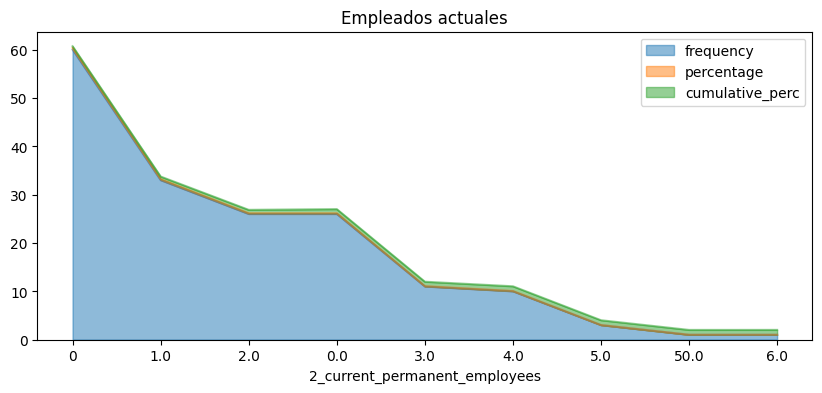

In [129]:
#Análisis univariable de una columna
cpe=freq_tbl(cuali2['2_current_permanent_employees'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_cpe=cpe.set_index('2_current_permanent_employees')
display(Filtro_cpe)

#Gráfica de área
Filtro_cpe.plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.title('Empleados actuales')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
4_number_permanent_employees_last_year,,,
0,76,0.444444,0.444444
0.0,32,0.187135,0.631579
2.0,24,0.140351,0.771930
1.0,21,0.122807,0.894737
4.0,8,0.046784,0.941520
3.0,6,0.035088,0.976608
6.0,2,0.011696,0.988304
45.0,1,0.005848,0.994152
5.0,1,0.005848,1.000000


Text(0.5, 1.0, 'Empleados del año anterior')

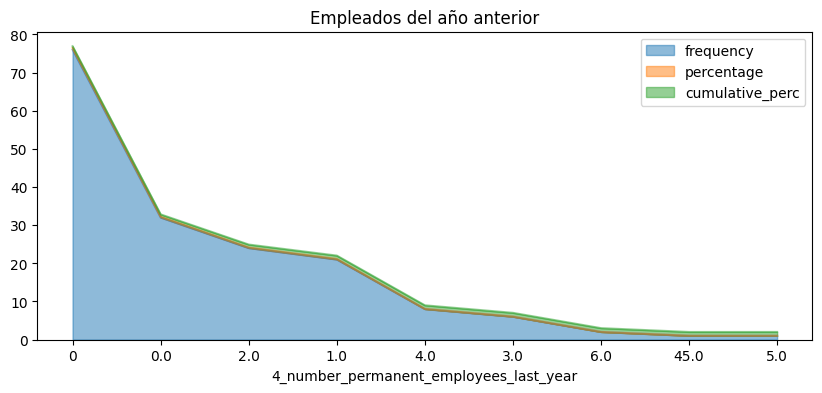

In [130]:
#Análisis univariable de una columna
npel=freq_tbl(cuali2['4_number_permanent_employees_last_year'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_npel=npel.set_index('4_number_permanent_employees_last_year')
display(Filtro_npel)

#Gráfica de área
Filtro_npel.plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.title('Empleados del año anterior')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
145_number_direct_competitors,,,
0,68,0.397661,0.397661
3.0,16,0.093567,0.491228
2.0,16,0.093567,0.584795
1.0,16,0.093567,0.678363
4.0,14,0.081871,0.760234
0.0,12,0.070175,0.830409
5.0,8,0.046784,0.877193
6.0,6,0.035088,0.912281
7.0,5,0.029240,0.941520


Text(0.5, 1.0, 'Número de competidores')

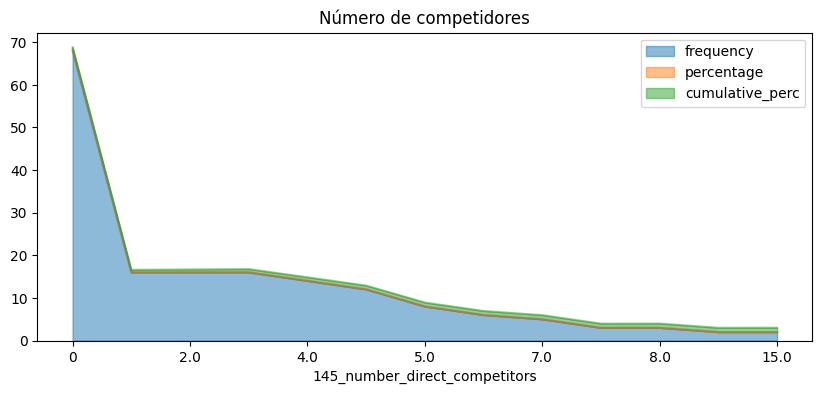

In [131]:
#Análisis univariable de una columna
ndc=freq_tbl(cuali2['145_number_direct_competitors'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_ndc=ndc.set_index('145_number_direct_competitors')
display(Filtro_ndc)

#Gráfica de área
Filtro_ndc.plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.title('Número de competidores')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
163_number_high_perishable_products,,,
0,93,0.543860,0.543860
0.0,36,0.210526,0.754386
20.0,9,0.052632,0.807018
2.0,5,0.029240,0.836257
1.0,4,0.023392,0.859649
5.0,4,0.023392,0.883041
6.0,3,0.017544,0.900585
15.0,3,0.017544,0.918129
10.0,2,0.011696,0.929825


Text(0.5, 1.0, 'Productos perecederos')

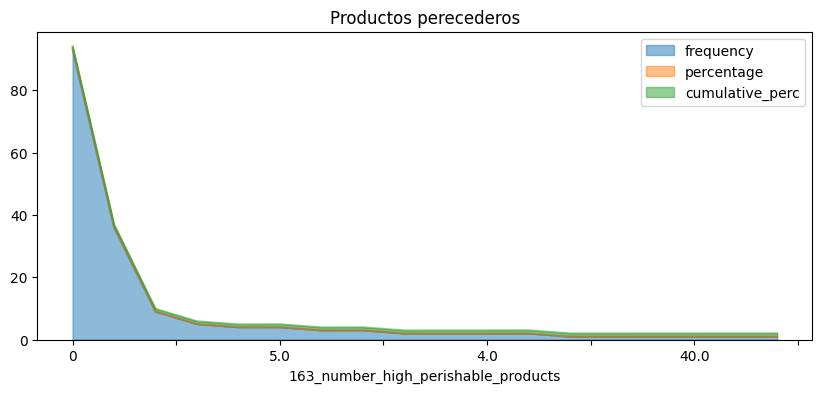

In [132]:
#Análisis univariable de una columna
nhpp=freq_tbl(cuali2['163_number_high_perishable_products'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_nhpp=nhpp.set_index('163_number_high_perishable_products')
display(Filtro_nhpp)

#Gráfica de área
Filtro_nhpp.plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.title('Productos perecederos')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
pictures_of_shelves_if_possible,,,
Sin datos,152,0.888889,0.888889
1 Photo,12,0.070175,0.959064
2 Photos,4,0.023392,0.982456
3 Photos,2,0.011696,0.994152
12 Photos,1,0.005848,1.000000


Text(0.5, 1.0, 'Fotos de estantes')

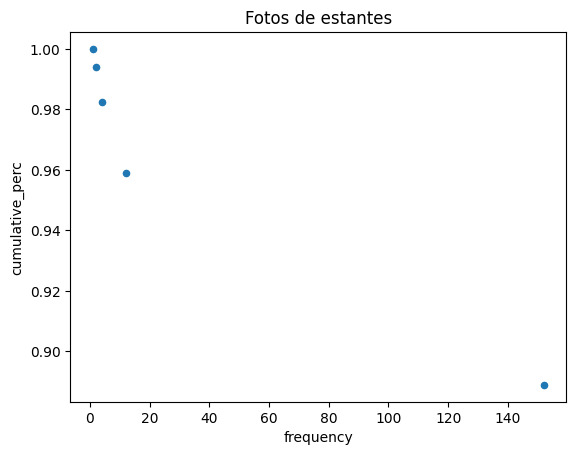

In [134]:
#Análisis univariable de una columna
poip=freq_tbl(cuali2['pictures_of_shelves_if_possible'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_poip=poip.set_index('pictures_of_shelves_if_possible')
display(Filtro_poip)

#Gráfica de dispersión
Filtro_poip.plot("frequency", "cumulative_perc", kind="scatter")
plt.title('Fotos de estantes')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,72,0.421053,0.421053
Sin datos,72,0.421053,0.842105
Disminuyó 15%,9,0.052632,0.894737
Aumentó 25%,7,0.040936,0.935673
Aumentó 15%,4,0.023392,0.959064
Aumentó 50% o más,4,0.023392,0.982456
Disminuyó 25%,2,0.011696,0.994152
Disminuyó 50% o más,1,0.005848,1.000000


Text(0.5, 1.0, 'Cambio de espacio en estantes respecto al año pasado')

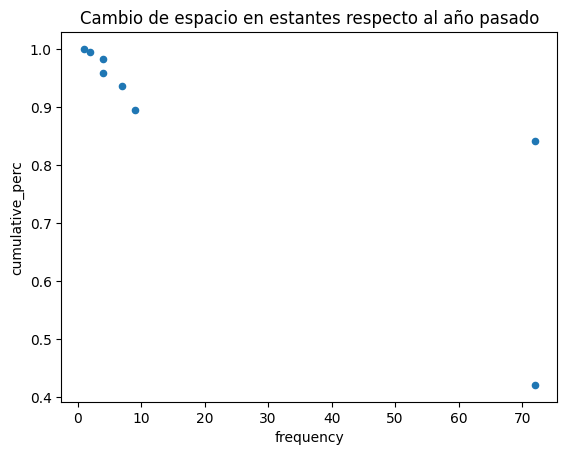

In [135]:
#Análisis univariable de una columna
cssl=freq_tbl(cuali2['5_change_store_space_last_year'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_cssl=cssl.set_index('5_change_store_space_last_year')
display(Filtro_cssl)

#Gráfica de dispersión
Filtro_cssl.plot("frequency", "cumulative_perc", kind="scatter")
plt.title('Cambio de espacio en estantes respecto al año pasado')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
49_inventory_records,,,
Sin datos,61,0.356725,0.356725
En papel,40,0.233918,0.590643
Software especializado + computadora,21,0.122807,0.713450
En Excel,20,0.116959,0.830409
No lo hago,18,0.105263,0.935673
"En Excel,En papel",7,0.040936,0.976608
Mentalmente,1,0.005848,0.982456
Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.988304
"En papel,Mental",1,0.005848,0.994152


Text(0.5, 1.0, 'Registro de inventarios')

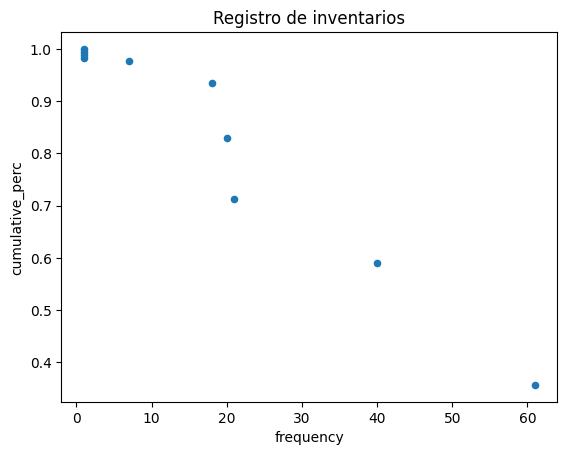

In [136]:
#Análisis univariable de una columna
ir=freq_tbl(cuali2['49_inventory_records'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_ir=ir.set_index('49_inventory_records')
display(Filtro_ir)

#Gráfica de dispersión
Filtro_ir.plot("frequency", "cumulative_perc", kind="scatter")
plt.title('Registro de inventarios')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
18_sales_records,,,
Sin datos,61,0.356725,0.356725
En papel,47,0.274854,0.631579
Software especializado + computadora,22,0.128655,0.760234
No lo hago,14,0.081871,0.842105
En Excel,10,0.058480,0.900585
Caja registradora (análoga),4,0.023392,0.923977
"En Excel,En papel",4,0.023392,0.947368
Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.953216
"Aplicación móvil (i.e. App) + smartphone,Caja registradora (análoga)",1,0.005848,0.959064


Text(0.5, 1.0, 'Recuento de ventas')

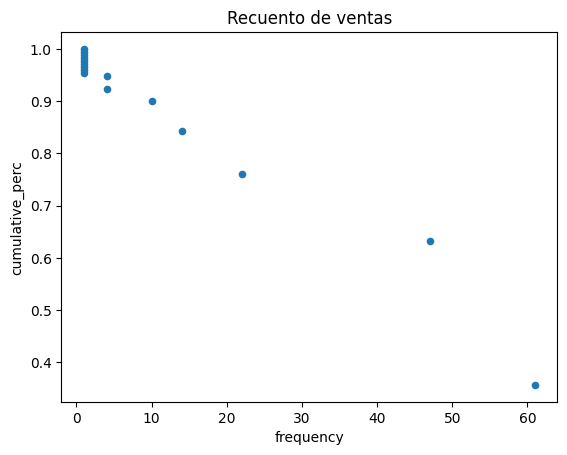

In [137]:
#Análisis univariable de una columna
sr=freq_tbl(cuali2['18_sales_records'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_sr=sr.set_index('18_sales_records')
display(Filtro_sr)

#Gráfica de dispersión
Filtro_sr.plot("frequency", "cumulative_perc", kind="scatter")
plt.title('Recuento de ventas')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
189_payment_methods,,,
Sin datos,64,0.374269,0.374269
Efectivo,40,0.233918,0.608187
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30,0.175439,0.783626
"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
"Efectivo,Transferencia interbancaria",15,0.087719,0.982456
"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",1,0.005848,0.988304
"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria,Trueque (e.g. comercio o intercambio)",1,0.005848,0.994152
Tarjeta de débito y/o crédito,1,0.005848,1.000000


Text(0.5, 1.0, 'Método de pago')

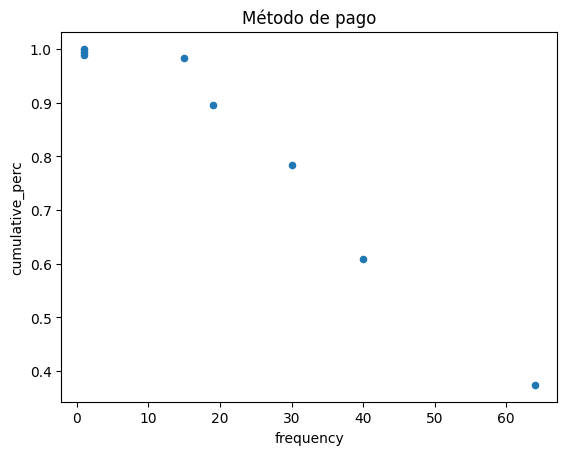

In [138]:
#Análisis univariable de una columna
pm=freq_tbl(cuali2['189_payment_methods'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_pm=pm.set_index('189_payment_methods')
display(Filtro_pm)

#Gráfica de dispersión
Filtro_pm.plot("frequency", "cumulative_perc", kind="scatter")
plt.title('Método de pago')